In [1]:
import nltk
from collections import Counter
import glob
import os
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Paths for all the different corpora
folderpaths = ['../Corpora/AnxietyMeditations/', '../Corpora/SleepMeditations/',
               '../Corpora/LearningAndGrowthMeditations/', '../Corpora/MorningMeditations/']

#array to store the text of each file 
corpus = []
text2 = ""

for folder in folderpaths:
    if folder == '../Corpora/AnxietyMeditations/':
        for doc in glob.glob(os.path.join(folder, '*.txt')):
            with open(doc, 'r') as f:
                text = f.read()
                corpus.append(text)
                text2 += text
    elif folder == '../Corpora/SleepMeditations/':
        for doc in glob.glob(os.path.join(folder, '*.txt')):
            with open(doc, 'r') as f:
                text = f.read()
                corpus.append(text)
                text2 += text
    elif folder == '../Corpora/LearningAndGrowthMeditations/':
        for doc in glob.glob(os.path.join(folder, '*.txt')):
            with open(doc, 'r') as f:
                text = f.read()
                corpus.append(text)
                text2 += text
    elif folder == '../Corpora/MorningMeditations/':
        for doc in glob.glob(os.path.join(folder, '*.txt')):
            with open(doc, 'r') as f:
                text = f.read()
                corpus.append(text)
                text2 += text

newStopWords = ['[', ']', '`', '#', '$',
                '(', ')', "Music", ':', "....", "--", ",", "''", '`', '"']
stopwords = set(stopwords.words('english') +
                newStopWords + list(string.punctuation))

# Tokenizing by word and filtering stopwords
all_tokens = [w for w in word_tokenize(text2.lower()) if not w in stopwords]

In [2]:
import nltk
from nltk.tokenize import word_tokenize

# Preprocess the text data
tokenized_corpus = []
for text in corpus:
    # Tokenize and lowercase
    tokens = [w for w in word_tokenize(text.lower()) if not w in stopwords]
    tokenized_corpus.append(tokens)


In [3]:
import os
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
# Preprocess the text data
tokenized_corpus = []
for text in corpus:
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    tokenized_corpus.append(tokens)

context_windows = []
window_size = 4  # Size of the context window

for sentence in tokenized_corpus:
    sentence_length = len(sentence)
    for i in range(sentence_length):
        # Extract the target word
        target_word = sentence[i]

        # Extract the context words within the window size
        context_words = []
        for j in range(max(0, i - window_size), min(sentence_length, i + window_size + 1)):
            if j != i:
                context_words.append(sentence[j])

        # Append the target word and its context words as a tuple
        # Convert context_words to tuple
        context_windows.append((target_word, tuple(context_words)))

# Train the Word2Vec model
model = Word2Vec(context_windows, window=5,
                 min_count=10, sg=0)  # CBOW approach

# Accessing trained word vectors
word_vector = model.wv['breathe']  # Get the word vector for a specific word
print(word_vector)

[-0.03819535  0.04834014  0.00775208  0.09760889  0.05659143 -0.0613988
  0.09087768  0.04103731 -0.08599274  0.00055327  0.0135132  -0.09356832
  0.03290385 -0.0326057   0.01504322  0.0549505   0.00163424 -0.09841386
 -0.0174082  -0.20772558 -0.0034911   0.08241381  0.07754909 -0.06875013
 -0.00909391  0.07716376 -0.04761914 -0.01475564 -0.10291885 -0.00637781
  0.07189971  0.02733458  0.04330396  0.02185787 -0.09256873  0.07893018
  0.00592612  0.01051878 -0.0485431  -0.10763716  0.08733942 -0.01952131
 -0.01752504 -0.04429846  0.05848509 -0.03397558 -0.06402476  0.06605659
  0.08606509  0.014656   -0.01198517 -0.01458307  0.00741381  0.00967677
 -0.05803168  0.0430639   0.00765045 -0.05888486 -0.00363422 -0.03467392
  0.00765256  0.04292138  0.08392993  0.01651139 -0.04579517  0.01373987
 -0.099681    0.01439989 -0.09461083 -0.01989236 -0.0192479   0.07205833
  0.01693948 -0.02384318  0.01267955 -0.03392114  0.00930619 -0.09857465
 -0.04084775 -0.04976666 -0.01896057 -0.05670878 -0.

In [4]:
import os
import nltk
from gensim.models import Word2Vec

# Define the directory containing the text files
directory = "./txt Files/"

all_vectors = { 'sight': [], 'smell': [], 'sound': [], 'taste': []
, 'touch': []}

# Iterate over the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        filepath = os.path.join(directory, filename)
        with open(filepath, "r") as f:
            text = f.read()
            words = nltk.word_tokenize(text)
            for word in words:
                try:
                    word_vector = model.wv[word.lower()]
                    all_vectors[filename[:-4]].append(word_vector)
                    # print(f"Word: {word}\nVector: {word_vector}\n")
                except KeyError:
                    continue
                    # print(f"Word '{word}' not in vocabulary.\n")

# print(len(all_vectors['sight']))
# print(len(all_vectors['sight']))


In [5]:
import numpy as np
from scipy.spatial.distance import cosine

for key in all_vectors.keys(): 
    # Calculate the pairwise cosine similarity distance between each row in the matrix
    sight_len = len(all_vectors[key])
    distances = np.zeros((sight_len, sight_len))
    for i in range(sight_len):
        for j in range(i+1, sight_len):
            distances[i][j] = cosine(all_vectors[key][i], all_vectors[key][j])
            distances[j][i] = distances[i][j]

    # Print the resulting distance matrix
    # distances = distances[:10, :10]
    print(distances.shape)
distances
# Normalize the matrix to the range 0-1
# normalized_distance = (distances - np.min(distances)) / (np.max(distances) - np.min(distances))

(21, 21)
(10, 10)
(20, 20)
(12, 12)
(23, 23)


array([[0.        , 0.87711361, 0.878365  , 0.87338747, 0.83946738,
        0.96035609, 0.92372012, 0.8112763 , 1.00311855, 0.87052105,
        0.99820343, 0.96677036, 0.86784217, 0.97867909, 0.87761018,
        0.82728332, 0.96793116, 0.85002926, 0.88314737, 1.15110552,
        0.94215044, 1.08543612, 0.98084872],
       [0.87711361, 0.        , 0.00464886, 0.00439775, 0.97916457,
        1.20229495, 0.90000077, 0.92267024, 0.96929107, 0.00388163,
        0.79113361, 0.85008809, 0.00406408, 1.07409405, 0.00309181,
        0.96020246, 0.94092836, 1.00254124, 0.00510442, 1.14100917,
        1.20104735, 1.00414523, 0.98142296],
       [0.878365  , 0.00464886, 0.        , 0.00366426, 0.97672005,
        1.20344897, 0.90295234, 0.93498803, 0.97751679, 0.00541121,
        0.78514729, 0.85138455, 0.00484234, 1.06595699, 0.00566536,
        0.96113895, 0.9251613 , 1.01051885, 0.00623721, 1.1459292 ,
        1.20761053, 0.99639425, 0.97724847],
       [0.87338747, 0.00439775, 0.00366426, 0.   

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

dist_matrix = pd.DataFrame(distances)
dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.000000,0.877114,0.878365,0.873387,0.839467,0.960356,0.923720,0.811276,1.003119,0.870521,...,0.978679,0.877610,0.827283,0.967931,0.850029,0.883147,1.151106,0.942150,1.085436,0.980849
1,0.877114,0.000000,0.004649,0.004398,0.979165,1.202295,0.900001,0.922670,0.969291,0.003882,...,1.074094,0.003092,0.960202,0.940928,1.002541,0.005104,1.141009,1.201047,1.004145,0.981423
2,0.878365,0.004649,0.000000,0.003664,0.976720,1.203449,0.902952,0.934988,0.977517,0.005411,...,1.065957,0.005665,0.961139,0.925161,1.010519,0.006237,1.145929,1.207611,0.996394,0.977248
3,0.873387,0.004398,0.003664,0.000000,0.978709,1.191447,0.904441,0.929457,0.991880,0.005177,...,1.069101,0.004862,0.968159,0.923774,0.998481,0.005601,1.141572,1.196628,1.012128,0.997627
4,0.839467,0.979165,0.976720,0.978709,0.000000,0.947226,1.036762,0.766776,0.955435,0.963149,...,1.170505,0.972164,0.922199,1.060658,1.119609,0.963118,0.995930,0.955731,1.033519,1.040040
5,0.960356,1.202295,1.203449,1.191447,0.947226,0.000000,1.196607,1.063884,0.891417,1.201968,...,1.002857,1.217318,1.015623,1.053476,0.943130,1.194862,0.937074,1.044196,1.118331,1.069524
6,0.923720,0.900001,0.902952,0.904441,1.036762,1.196607,0.000000,1.053040,0.969849,0.902098,...,0.887461,0.912193,0.951130,1.070761,0.817377,0.912911,1.077305,0.884148,0.915681,1.084434
7,0.811276,0.922670,0.934988,0.929457,0.766776,1.063884,1.053040,0.000000,1.087588,0.930488,...,1.038291,0.913848,0.847120,1.055618,1.116986,0.940309,0.974364,0.769721,1.032842,0.859509
8,1.003119,0.969291,0.977517,0.991880,0.955435,0.891417,0.969849,1.087588,0.000000,0.977683,...,0.984295,0.978771,0.957151,1.069875,0.938204,0.981650,1.040280,0.837546,1.009118,0.862980
9,0.870521,0.003882,0.005411,0.005177,0.963149,1.201968,0.902098,0.930488,0.977683,0.000000,...,1.074792,0.005286,0.960132,0.946411,1.009345,0.004941,1.150399,1.206608,0.997357,0.983277


In [7]:
scalar = StandardScaler()
 
# fitting
scalar.fit(dist_matrix)
scaled_data = scalar.transform(distances)
 
# Importing PCA
from sklearn.decomposition import PCA
 
# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
 
x_pca.shape

(23, 2)

Text(0, 0.5, 'Second Principal Component')

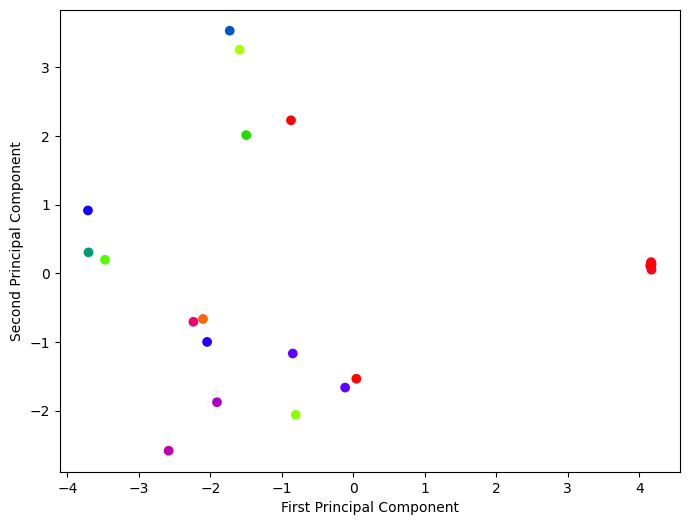

In [23]:
plt.figure(figsize =(8, 6))
 
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = dist_matrix[0], cmap ='prism')
 
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

<AxesSubplot: >

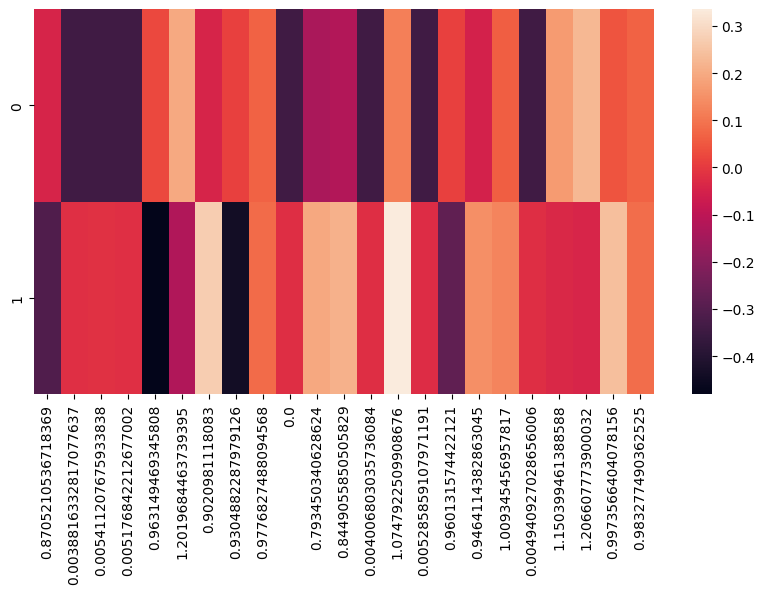

In [20]:
pca.components_

df_comp = pd.DataFrame(pca.components_, columns = distances[9])
 
plt.figure(figsize =(10, 5))
 
# plotting heatmap
sns.heatmap(df_comp)

In [21]:
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.36814446 0.10592648]

 Total Variance Explained: 47.41
